<a href="https://colab.research.google.com/github/Dywinar/project_3/blob/main/My_project_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Проект по модую 3: градиентный бустинг.

Вам предстоит реализовать модель градиентного бустинга, использующий в качестве базового алгортима линейую регрессию. Основная идея такова: Мы хотим заставить модели исправлять ошибки друг друга. Конкретнее, мы обучим модель, которая будет предсказывать результат. Далее вычтим предсказания модели из реальных ответов. Получившаяся разность - допущенная первой моделью ошибка. Далее обучим на этих разностях следующую модель. Она исправит часть ошибок первой модели, но наделает своих. Не беда, снова вычтим ответы второй модели из дынных, на которых она училась, и на получившихся ответах обучим третью модель (третья модель будет учится на оригинальных данных, из которых вычли предсказания первых двух моделей). И так далее. Предсказанием итоговой модели будет сумма предсказаний базовых алгоритмов.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Задача 1 (3 балла).

Вы будете работать с данными о ценах квартир, целевая переменая - median_house_value. Необходимо выполнить предобработку данных. Рекомендация: измеряйте цену не в долларах, а в тысячах долларов.

In [115]:
df_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
df_test = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [116]:
X_train = df_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
y_train = df_train['median_house_value'] / 1000

In [147]:
X_test = df_test[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)
y_test = df_test['median_house_value'] / 1000


Опишите функцию, которая создаёт массив с моделями и обучает их описанным выше способом. Использование классов вместо функций крайне приветствуюется.

In [123]:
class GradientBoostingRegressor():
    def __init__(self, n_models = 20):
        self.n_models = n_models
        self.models = []
    def my_fit(self, X, y):
      residual = np.array(y.sample(frac=1))
      for i in range(self.n_models):
        model = LinearRegression()
        model.fit(X, residual)
        self.models.append(model)
        prediction = self.my_predict(X)
        residual -= prediction
    def my_predict(self, X,):
      preds = np.zeros(len(X))
      for i in range(len(self.models)):
        preds += self.models[i].predict(X)
      return preds

Опишите функцию (или метод класса) predict.

In [ ]:
#описана в Классе GradientBoostingRegressor

Исследуйте, как зависит MSE от количества моделй. Постройте график MSE(num_of_models).

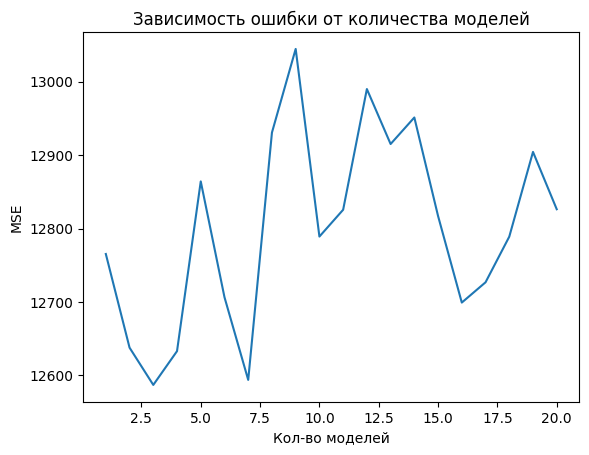

In [124]:
def plot(n_models,MSE):
      plt.plot(np.arange(1, n_models),MSE)
      plt.xlabel("Кол-во моделей")
      plt.ylabel("MSE")
      plt.title("Зависимость ошибки от количества моделей")
      plt.show()
MSE = np.zeros(20)
for n_models in range(20):
  model = GradientBoostingRegressor()
  model.my_fit(X_train,y_train)
  MSE[n_models] =  ((y_test - model.my_predict(X_test))**2).mean()
plot(21, MSE)

Задача 2 (1 балл). Объясните, почему всё, что было сделано до этого бессмысленно и не может работать лучше обычной линейной регрессии. Ниже вы видете 2 нелинейные функции f и f_1, одна является обратной к другой. Другими солвами f(f_1(x)) = x. Встройте их в код обучения и предсказания модели, чтобы добавить нелинейности. Иными словами, модель номер n должна предсказывать НЕ $$y - \hat{y}_1 - \hat{y}_2 - ... - \hat{y}_{n-1}$$, А
$$f(y - f^{-1}(\hat{y}_1) - f^{-1}(\hat{y}_2) - ... - f^{-1}(\hat{y}_{n-1}))$$

Почему? ...


Проделайте все пункты задачи 1 с улучшенной моделью.

In [ ]:
# Лично как я понял, так как при отсутствуи линейности в входных данных, сама модель, по большей части не сильно уменьшает ошибки, так как при линейной зависимости она довольно быстро находит ее.

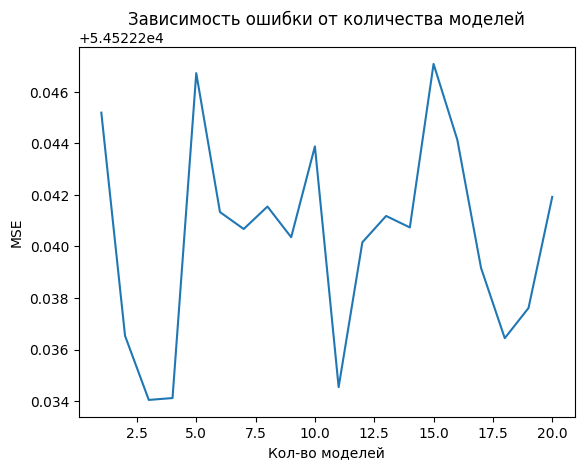

In [148]:
def f(x):
    return np.tan(x)

def f_1(x):
    return np.arctan(x)
class GradientBoostingRegressor():
    def __init__(self, n_models = 20):
        self.n_models = n_models
        self.models = []
    def my_fit(self, X, y):
      residual = np.array(y.sample(frac=1))
      for i in range(self.n_models):
        model = LinearRegression()
        model.fit(X, residual)
        self.models.append(model)
        prediction = f(self.my_predict(X))
        residual -= prediction
    def my_predict(self, X,):
      preds = np.zeros(len(X))
      for i in range(len(self.models)):
        preds += self.models[i].predict(X)
      return f_1(preds)
def plot(n_models,MSE):
      plt.plot(np.arange(1, n_models),MSE)
      plt.xlabel("Кол-во моделей")
      plt.ylabel("MSE")
      plt.title("Зависимость ошибки от количества моделей")
      plt.show()
MSE = np.zeros(20)
for n_models in range(20):
  model = GradientBoostingRegressor()
  model.my_fit(X_train,y_train)
  MSE[n_models] =  ((y_test - model.my_predict(X_test))**2).mean()
plot(21,MSE)

In [ ]:
# А почему каждый раз получается новая ломанная?

Задача 3 (1 балл). Если вы запустите написанный код несколько раз, то заметите, что ломанная получается каждый раз новая. А есть ли какой-то общий тренд? Вам предстоит это изучить. Запустите процесс получения массива с MSE (который вы использовали для построения графиков ранее) 50 раз. Рекомендуется исследовать количество моделей от 1 до 20. После этого возьмите среднее арифметическое от всех 50 MSE для каждого количества моделей. Итого у вас снова получится массив из 20 уже усреднённых MSE. Ваш код будет выполняться в районе 3 минут. Вновь постройте график и сделайте вывод об оптимальном количестве моделей.

Mse_выполненно:  0
Mse_выполненно:  1
Mse_выполненно:  2
Mse_выполненно:  3
Mse_выполненно:  4
Mse_выполненно:  5
Mse_выполненно:  6
Mse_выполненно:  7
Mse_выполненно:  8
Mse_выполненно:  9
Mse_выполненно:  10
Mse_выполненно:  11
Mse_выполненно:  12
Mse_выполненно:  13
Mse_выполненно:  14
Mse_выполненно:  15
Mse_выполненно:  16
Mse_выполненно:  17
Mse_выполненно:  18
Mse_выполненно:  19
Mse_выполненно:  20
Mse_выполненно:  21
Mse_выполненно:  22
Mse_выполненно:  23
Mse_выполненно:  24
Mse_выполненно:  25
Mse_выполненно:  26
Mse_выполненно:  27
Mse_выполненно:  28
Mse_выполненно:  29
Mse_выполненно:  30
Mse_выполненно:  31
Mse_выполненно:  32
Mse_выполненно:  33
Mse_выполненно:  34
Mse_выполненно:  35
Mse_выполненно:  36
Mse_выполненно:  37
Mse_выполненно:  38
Mse_выполненно:  39
Mse_выполненно:  40
Mse_выполненно:  41
Mse_выполненно:  42
Mse_выполненно:  43
Mse_выполненно:  44
Mse_выполненно:  45
Mse_выполненно:  46
Mse_выполненно:  47
Mse_выполненно:  48
Mse_выполненно:  49


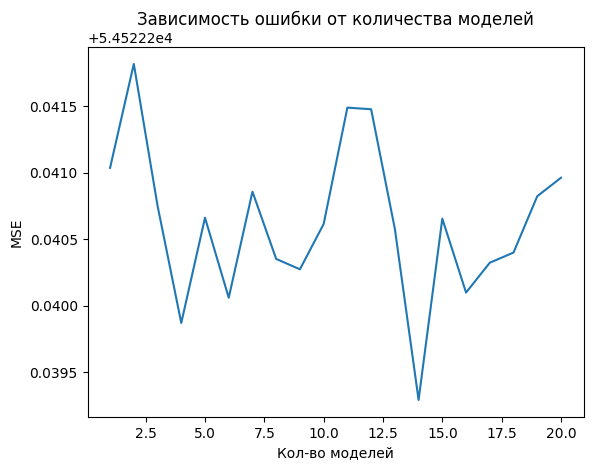

In [145]:
MSE_mean = []
for nam_MSE in range(50):
  MSE = np.zeros(20)
  for n_models in range(20):
    model = GradientBoostingRegressor()
    model.my_fit(X_train,y_train)
    MSE[n_models] =  ((y_test - model.my_predict(X_test))**2).mean()
  MSE_mean.append(MSE)
  print('Mse_выполненно: ', nam_MSE)
MSE_mean = np.array(MSE_mean).T.mean(axis=1)
plot(21,MSE_mean)

In [ ]:
# Судя по графику мнимальная ошибка допускается, в диапозоне с 12 до 15  моделей, что свидетильствует о малькой ошибке на данном кол-во моделей